# Exercise 8 - 2D Navier-Stokes equation in a cavity

In this exercise, all of our previous exercises are coming together to solve the 2D Navier-Stokes equation in square cavity. The governing equations are 

\begin{align}
\nabla \cdot \vec{v} &= 0 \\
\dfrac{\partial \vec{v}}{\partial t} + (\vec{v} \cdot \nabla) \vec{v} &= -\dfrac{\nabla p}{\rho} + \nu \nabla^2 \vec{v}
\end{align}

The first equation expresses conservation of mass for an incompressible fluid. The second equation represents conservation of momentum, which in 2D corresponds to two scalar equations in terms of velocity components $\vec{v} = (u,v)$. Let's write the scalar equations for simplicity:

\begin{align}
\dfrac{\partial u}{\partial x} + \dfrac{\partial v}{\partial y} &= 0 \\
\dfrac{\partial u}{\partial t} + u\dfrac{\partial u}{\partial x} + v \dfrac{\partial u}{\partial y} &= -\dfrac{1}{\rho}\dfrac{\partial p}{\partial x} + \nu \left( \dfrac{\partial^2 u}{\partial x^2} + \dfrac{\partial^2 u}{\partial y^2} \right) \\
\dfrac{\partial v}{\partial t} + u\dfrac{\partial v}{\partial x} + v \dfrac{\partial v}{\partial y} &= -\dfrac{1}{\rho}\dfrac{\partial p}{\partial y} + \nu \left( \dfrac{\partial^2 v}{\partial x^2} + \dfrac{\partial^2 v}{\partial y^2} \right)
\end{align}

Now, we pause to notice that this system of equations is not closed--we have no expression for pressure in this equation, only for the pressure gradient. We want an expression for pressure in order to be able to solve the coupled pressure-velocity system.

There are a number of pressure-velocity coupling approaches. This exercise illustrates a simple one based on the continuity equation (Eqn. 1). It proceeds as follows. First, let us take the divergence of the momentum equation in Eqn. 2:

\begin{align}
\nabla \cdot \left(\dfrac{\partial \vec{v}}{\partial t} \right) + \nabla \cdot \left( (\vec{v} \cdot \nabla) \vec{v} \right) &= \nabla \cdot \left(\dfrac{-\nabla p}{\rho}  \right) + \nabla \cdot \left( \nu \nabla^2 \vec{v} \right)
\end{align}

Let's simplify these term by term, starting with the first term on the LHS:

$$
\nabla \cdot \left(\dfrac{\partial \vec{v}}{\partial t} \right) = \dfrac{\partial}{\partial x} \dfrac{\partial u}{\partial t} + \dfrac{\partial}{\partial y} \dfrac{\partial v}{\partial t} = \dfrac{\partial}{\partial t} \underbrace{\left( \dfrac{\partial u}{\partial x} + \dfrac{\partial v}{\partial y} \right)}_{\text{Eqn. 3}}
$$

Second term on the LHS:
$$
\nabla \cdot \left( (\vec{v} \cdot \nabla) \vec{v} \right) = \dfrac{\partial }{\partial x} \left( u \dfrac{\partial u}{\partial x} + v \dfrac{\partial u}{\partial u}\right) + \dfrac{\partial}{\partial y} \left(u \dfrac{\partial v}{\partial x} + v \dfrac{\partial v}{\partial y} \right) = \left(\dfrac{\partial u}{\partial x}\right)^2 + \left(\dfrac{\partial v}{\partial y}\right)^2 + 2 \dfrac{\partial u}{\partial y}\dfrac{\partial v}{\partial x} + u \left[ \dfrac{\partial}{\partial x} \underbrace{\left(\dfrac{\partial u}{\partial x} + \dfrac{\partial v}{\partial y}\right)}_{Eqn.3} \right] + v \left[ \dfrac{\partial}{\partial y} \underbrace{\left(\dfrac{\partial u}{\partial x} + \dfrac{\partial v}{\partial y}\right)}_{Eqn.3} \right]
$$

First term on the RHS:
$$
\nabla \cdot \left(\dfrac{-\nabla p}{\rho}  \right) = \dfrac{-1}{\rho} \left[ \dfrac{\partial}{\partial x}\left(\dfrac{\partial p}{\partial x} \right) + \dfrac{\partial }{\partial y}\left( \dfrac{\partial p}{\partial y} \right) \right] = \dfrac{-1}{\rho} \left( \dfrac{\partial^2 p}{\partial x^2} + \dfrac{\partial^2 p}{\partial y^2} \right)
$$

Second term on the RHS:
$$
\nabla \cdot \left( \nu \nabla^2 \vec{v} \right) = \nu \left[ \dfrac{\partial}{\partial x}\left(\dfrac{\partial^2 u}{\partial x^2}\right) + \dfrac{\partial}{\partial y}\left(\dfrac{\partial^2 v}{\partial y^2}\right) \right] = \nu \left[ \dfrac{\partial^2}{\partial x^2} \underbrace{\left( \dfrac{\partial u}{\partial x} + \dfrac{\partial v}{\partial y} \right)}_{Eqn.3} + \dfrac{\partial^2}{\partial y^2} \underbrace{\left( \dfrac{\partial u}{\partial x} + \dfrac{\partial v}{\partial y} \right)}_{Eqn.3}\right] = 0
$$

Now, notice the underbraced term in the above equations. It expresses the divergence-free condition of the velocity field. According to Eqn. 3, that term is zero. However, the term is only zero if the pressure field solution yields a velocity field that is divergence free. That is, as we solve the solutions iteratively, the pressure field at any instant of the solution must give a velocity field that is divergence free. Naturally, this condition may not be satisfied for an initial guessed pressure field, thus violating Eqn. 3 and meaning that the underbraced terms in the above equations will be non-zero. We approach this by iteratively solving the pressure field in "pseudo-time" at every time step until the pressure yields a divergence-free velocity. To do this, we will retain the divergence term from the first term of the LHS, and ignore it from all the other terms. After all, the divergence term is zero once the pressure field yields a divergence-free velocity field. Retaining the one divergence term will drive the pressure at each time step towards a solution that yields a divergence-free velocity.

Thus, we can rewrite Eqn. 6 as a Poisson equation in terms of pressure:

\begin{equation}
\left( \dfrac{\partial^2 p}{\partial x^2} + \dfrac{\partial^2 p}{\partial y^2} \right) = -\rho \left( \dfrac{\partial}{\partial t} \left( \dfrac{\partial u}{\partial x} \dfrac{\partial v}{\partial y} \right) + \dfrac{\partial u}{\partial x}\dfrac{\partial u}{\partial x} + 2 \dfrac{\partial u}{\partial y}\dfrac{\partial v}{\partial x} + \dfrac{\partial v}{\partial y}\dfrac{\partial v}{\partial y} \right)
\end{equation}

Now, Eqns. (4), (5), and (7) constitute the governing equations that we will discretize to solve for the velocity and pressure within our solution.

## Discretized equations

Let us proceed with discretizing these equations. For starters, let's use backwards finite differences for the convective terms, centered differences for the pressure terms, and centered differences for the diffusion terms. For time, we'll use simple explicit method:

This yields for the $u$-velocity:

\begin{equation}
\dfrac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} + u_{i,j}^n \dfrac{u_{i,j}^n - u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \dfrac{u_{i,j}^n - u_{i,j-1}^n}{\Delta y} = \dfrac{-1}{\rho} \dfrac{p_{i+1,j}^n - p_{i-1,j}^n}{2\Delta x} + \nu \left( \dfrac{u_{i+1,j}^n - 2u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \dfrac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2} \right)
\end{equation}
For the $v$-velocity:
\begin{equation}
\dfrac{v_{i,j}^{n+1} - v_{i,j}^n}{\Delta t} + u_{i,j}^n \dfrac{v_{i,j}^n - v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \dfrac{v_{i,j}^n - v_{i,j-1}^n}{\Delta y} = \dfrac{-1}{\rho} \dfrac{p_{i,j+1}^n - p_{i,j-1}^n}{2\Delta y} + \nu \left( \dfrac{v_{i+1,j}^n - 2v_{i,j}^n + v_{i-1,j}^n}{\Delta x^2} + \dfrac{v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n}{\Delta y^2} \right)
\end{equation}
For the pressure Poisson:
\begin{equation}
\dfrac{p_{i+1,j}^n - 2 p_{i,j}^n + p_{i-1,j}^n}{\Delta x^2} + \dfrac{p_{i,j+1}^n - 2p_{i,j}^n + p_{i,j-1}^n}{\Delta y^2} = -\rho \left[ \dfrac{1}{\Delta t} \left( \dfrac{u_{i+1,j}^n - u_{i-1,j}^n}{2\Delta x} + \dfrac{v_{i,j+1}^n - v_{i,j-1}^n}{2\Delta y} \right) + \dfrac{u_{i+1,j}^n-u_{i-1,j}^n}{2\Delta x}\dfrac{u_{i+1,j}^n-u_{i-1,j}^n}{2\Delta x} + 2 \dfrac{u_{i,j+1}^n-u_{i,j+1}^n}{2\Delta y}\dfrac{v_{i+1,j}^n-v_{i-1,j}^n}{2\Delta x} + \dfrac{v_{i,j+1}^n-v_{i,j-1}^n}{2\Delta y}\dfrac{v_{i,j+1}^n-v_{i,j-1}^n}{2\Delta y} \right]
\end{equation}

More simply, let's define a pressure source term $b$ 

$$
b_{i,j}^n = -\rho \left[ \dfrac{1}{\Delta t} \left( \dfrac{u_{i+1,j}^n - u_{i-1,j}^n}{2\Delta x} + \dfrac{v_{i,j+1}^n - v_{i,j-1}^n}{2\Delta y} \right) + \dfrac{u_{i+1,j}^n-u_{i-1,j}^n}{2\Delta x}\dfrac{u_{i+1,j}^n-u_{i-1,j}^n}{2\Delta x} + 2 \dfrac{u_{i,j+1}^n-u_{i,j+1}^n}{2\Delta y}\dfrac{v_{i+1,j}^n-v_{i-1,j}^n}{2\Delta x} + \dfrac{v_{i,j+1}^n-v_{i,j-1}^n}{2\Delta y}\dfrac{v_{i,j+1}^n-v_{i,j-1}^n}{2\Delta y} \right]
$$

and write the discrete pressure equation in explicit form as

\begin{equation}
\dfrac{p_{i+1,j}^n - p_{i,j}^n + p_{i-1,j}^n}{\Delta x^2} + \dfrac{p_{i,j-1}^n - p_{i,j}^n + p_{i,j-1}^n}{\Delta y^2} = b_{i,j}^n.
\end{equation}

The discrete pressure equation can be solved using the explicit methods that we used for solving the steady 2D heat equation (e.g. Gauss-Seidel, Jacobi, etc). For this example, we will use Jacobi iteration, which is very simple but lacks efficiency.

## Problem description

We are going to solve a lid-driven cavity problem. The domain consists of a square with $x \in (0,1)$ and $y \in (0,1)$. The boundary conditions are

$$ u = 1 \text{ and } v  = 0 \text{ at the lid } (y = 1)$$
$$ u = v = 0 \text{ other boundaries} $$
$$ \dfrac{\partial p}{\partial y} = 0 \text{ at } y=1 $$
$$ \dfrac{\partial p}{\partial x} = 0 \text{ at } x=0, 1 $$
$$ p = 0 \text{ at } y = 0 $$

The cavity initial condition is

$$ \vec{v}(\vec{x},0) = (0,0) $$
$$ p(\vec{x},0) = 0 $$

## Python code

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

This subroutine builds up the RHS $b$ quantity:

In [33]:
def build_up_b(b, rho, dt, u, v, dx, dy):
    
    b[1:-1, 1:-1] = (rho * (1 / dt * 
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                      (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                            (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))
    
    return b

This subroutine solves the pressure Poisson equation:

In [34]:
def pressure_poisson(p, dx, dy, b):
    # Solve pressure Poisson equation using Jacobi iteration
    
    TOL = 1E-4
    MAX = 10000
    l2norm = 1
    l = 0
    while (l2norm > TOL):
        if (l > MAX):
            raise Exception('Pressure system not converged after 10,000 iterations')
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + 
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])

        p[:, -1] = p[:, -2] # dp/dx = 0 at x = 2
        p[0, :] = p[1, :]   # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]   # dp/dx = 0 at x = 0
        p[-1, :] = 0        # p = 0 at y = 2
        l2norm = (np.sum((p-pn)**2))**0.5
        l+=1
    return p, l

The below two subroutines evaluate the RHS function of the $u$ and $v$ velocity equations:

In [35]:
def feval(p, u, v, dx, dy, rho, nu):
    # Sub-routine to evaluate the RHS function of the u-velocity equation. 
    # Uses 2nd-order centered differences to discretize the spatial derivatives
    # in the convective and viscous terms
    f = 0*u.copy()
    
    f[1:-1, 1:-1] = (-u[1:-1, 1:-1] / (2*dx) *
                            (u[1:-1, 2:] - u[1:-1, 0:-2]) -
                              v[1:-1, 1:-1] / (2*dy) *
                            (u[2:, 1:-1] - u[0:-2, 1:-1]) -
                              1 / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) + 
                              nu * ( 
                                  1 / dx**2 *(u[1:-1, 2:] - 2 * u[1:-1, 1:-1] + u[1:-1, 0:-2]) +
                                  1 / dy**2 *(u[2:, 1:-1] - 2 * u[1:-1, 1:-1] + u[0:-2, 1:-1])
                                  )
                    )                        
                     
    return f

def geval(p, u, v, dx, dy, rho, nu):
    # Sub-routine to evaluate the RHS function of the v-velocity equation. 
    # Uses 2nd-order centered differences to discretize the spatial derivatives
    # in the convective and viscous terms
    g = 0*v.copy()
              
    g[1:-1,1:-1] = (-u[1:-1, 1:-1] / (2*dx) *
                    (v[1:-1, 2:] - v[1:-1, 0:-2]) -
                    v[1:-1, 1:-1] / (2*dy) *
                    (v[2:, 1:-1] - v[0:-2, 1:-1]) -
                    1 / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                    nu * (1 / dx**2 *
                    (v[1:-1, 2:] - 2 * v[1:-1, 1:-1] + v[1:-1, 0:-2]) +
                    1 / dy**2 *
                    (v[2:, 1:-1] - 2 * v[1:-1, 1:-1] + v[0:-2, 1:-1])))              
              
    return g

This subroutine solves the $u$ and $v$ velocity equations in time using either first-order Euler explicit or fourth-order Runge-Kutta temporal discretization:

In [36]:
def solveU(p,un,vn,dt,dx,dy,rho,nu,DDT):
    if (DDT == 'EE'):
        # Euler explicit time integration
        us = un + dt*feval(p, un, vn, dx, dy, rho, nu)
        vs = vn + dt*geval(p, un, vn, dx, dy, rho, nu)
    else:
        # Runge-Kutta 4th order
        f1 = feval(p, un, vn, dx, dy, rho, nu)
        g1 = geval(p, un, vn, dx, dy, rho, nu)
        u1 = un + 0.5*dt*f1
        v1 = vn + 0.5*dt*g1
        f2 = feval(p, u1, v1, dx, dy, rho, nu)
        g2 = geval(p, u1, v1, dx, dy, rho, nu)
        u2 = un + 0.5*dt*f2
        v2 = vn + 0.5*dt*g2
        f3 = feval(p, u2, v2, dx, dy, rho, nu)
        g3 = geval(p, u2, v2, dx, dy, rho, nu)
        u3 = un + 1.0*dt*f3
        v3 = vn + 1.0*dt*g3
        f4 = feval(p, u3, v3, dx, dy, rho, nu)
        g4 = geval(p, u3, v3, dx, dy, rho, nu)
        us = un + (1.0/6.0)*dt*( f1 + 2.0*f2 + 2.0*f3 + f4 )
        vs = vn + (1.0/6.0)*dt*( g1 + 2.0*g2 + 2.0*g3 + g4 )
        
    # Enforce boundary conditions
    us[0, :]  = 0
    us[:, 0]  = 0
    us[:, -1] = 0
    us[-1, :] = 1    # set velocity on cavity lid equal to 1
    vs[0, :]  = 0
    vs[-1, :] = 0
    vs[:, 0]  = 0
    vs[:, -1] = 0
    
    return us, vs

### Main program:

In [53]:
# Define problem parameters
Re = 100.0
CFL = 0.25
nt = 2000

# Select time scheme 
# Options: 'RK' = Runge-Kutta 4th order; 'EE' = Euler explicit
DDT = 'RK'

# Define spatial grid info
Lx = 1.0
Ly = 1.0
nx = 51
ny = 51
dx = Lx/(nx-1)
dy = Ly/(ny-1)
rho = 1
x = np.linspace(0,Lx,nx)
y = np.linspace(0,Ly,ny)

[X,Y] = np.meshgrid(x,y)

# Define time step info
dt = CFL*dx/1.0
nu = Lx*1.0/Re
print('Time step=',dt,'s')

# Define initial conditions
u = np.zeros((ny,nx))
v = np.zeros((ny,nx))
p = np.zeros((ny,nx))

# Define boundary conditions
u[-1,:] = 1.0

un = np.empty_like(u)
vn = np.empty_like(v)
b = np.zeros((ny, nx))
l2normU = np.zeros(1)
l2normV = np.zeros(1)
    
for n in range(nt):
    if (n%10==0):
        print('Timestep:',n)
   
    un = u.copy()
    vn = v.copy()
    
    # Solve velocity equation for intermediate velocity
    [u, v] = solveU(p, un, vn, dt, dx, dy, rho, nu, DDT)
            
    # Compute mass source term
    b = build_up_b(b, rho, dt, u, v, dx, dy)
    
    # Solve pressure Poisson equation for pressure correction
    [p, l] = pressure_poisson(p, dx, dy, b)    
    
    if (n%10==0):
        print('  Iterations required for pressure Poisson eqn:',l)
               
    # Evaluate equation L2 norms
    l2normU = np.append(l2normU, (np.sum((u-un)**2))**0.5)
    l2normV = np.append(l2normV, (np.sum((v-vn)**2))**0.5)

Time step= 0.005 s
Timestep: 0
  Iterations required for pressure Poisson eqn: 649
Timestep: 10
  Iterations required for pressure Poisson eqn: 293
Timestep: 20
  Iterations required for pressure Poisson eqn: 166
Timestep: 30
  Iterations required for pressure Poisson eqn: 98
Timestep: 40
  Iterations required for pressure Poisson eqn: 60
Timestep: 50
  Iterations required for pressure Poisson eqn: 42
Timestep: 60
  Iterations required for pressure Poisson eqn: 40
Timestep: 70
  Iterations required for pressure Poisson eqn: 46
Timestep: 80
  Iterations required for pressure Poisson eqn: 51
Timestep: 90
  Iterations required for pressure Poisson eqn: 53
Timestep: 100
  Iterations required for pressure Poisson eqn: 51
Timestep: 110
  Iterations required for pressure Poisson eqn: 52
Timestep: 120
  Iterations required for pressure Poisson eqn: 54
Timestep: 130
  Iterations required for pressure Poisson eqn: 54
Timestep: 140
  Iterations required for pressure Poisson eqn: 52
Timestep: 150


  Iterations required for pressure Poisson eqn: 1
Timestep: 1370
  Iterations required for pressure Poisson eqn: 1
Timestep: 1380
  Iterations required for pressure Poisson eqn: 1
Timestep: 1390
  Iterations required for pressure Poisson eqn: 1
Timestep: 1400
  Iterations required for pressure Poisson eqn: 1
Timestep: 1410
  Iterations required for pressure Poisson eqn: 1
Timestep: 1420
  Iterations required for pressure Poisson eqn: 1
Timestep: 1430
  Iterations required for pressure Poisson eqn: 1
Timestep: 1440
  Iterations required for pressure Poisson eqn: 1
Timestep: 1450
  Iterations required for pressure Poisson eqn: 1
Timestep: 1460
  Iterations required for pressure Poisson eqn: 1
Timestep: 1470
  Iterations required for pressure Poisson eqn: 1
Timestep: 1480
  Iterations required for pressure Poisson eqn: 1
Timestep: 1490
  Iterations required for pressure Poisson eqn: 1
Timestep: 1500
  Iterations required for pressure Poisson eqn: 1
Timestep: 1510
  Iterations required for

### Plotting the results

First, let's plot the reduction in the $L^2$ error of the $u$ and $v$ velocity equations as a function of time step:

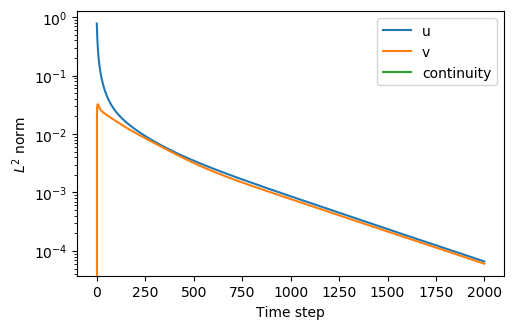

In [42]:
plt.figure(figsize=(5.5, 3.5), dpi=100)
plt.semilogy(l2normU[1:], label='u')
plt.semilogy(l2normV[1:], label='v')
plt.xlabel('Time step')
plt.ylabel('$L^2$ norm')
plt.legend()

Now let's plot the solution field. We'll use a vector plot to illustrate the velocity field and contours to illustrate the pressure field. To make the plot easier to view, we'll plot every second arrow in the $x$ and $y$ directions.

Text(0, 0.5, 'Y')

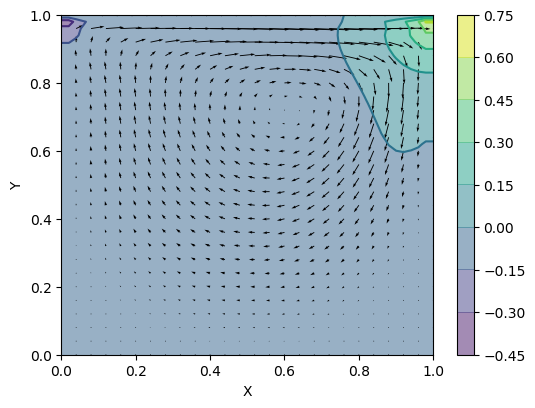

In [52]:
fig = plt.figure(figsize=(6, 4.5), dpi=100)
plt.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
plt.colorbar()
plt.contour(X, Y, p, cmap=cm.viridis)
plt.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2])
plt.xlabel('X')
plt.ylabel('Y')

Finally, we want to compare the results against benchmark data from literature. The benchmark data comes from

Ghia, U. K. N. G., Kirti N. Ghia, and C. T. Shin. "High-Re solutions for incompressible flow using the Navier-Stokes equations and a multigrid method." Journal of computational physics 48, no. 3 (1982): 387-411. https://www.academia.edu/download/36145312/Benchmark_LDC_01.pdf

We'll make use of the Pandas library to read in a CSV file containing the data from Ghia et al. at a Reynolds number of $Re = 100$.

Text(0.5, 1.0, 'Velocity profile at $x/L$ = 0.5')

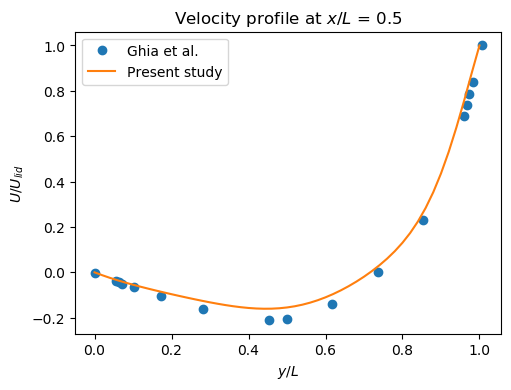

In [51]:
# Plot comparison to Ghia et al. at Re = 100
headers=['height','velocity']
df = pd.read_csv('C:/Users/jbrinker/Documents/Courses/ENGR491-CFD/jupyter/Ghia_Re100.csv',names=headers)
vel = df['velocity']
height = df['height']

fig = plt.figure(figsize=(5.5,4), dpi=100)
plt.plot(height,vel,'o',label='Ghia et al.')
plt.plot(Y[:,int(nx/2)],u[:,int(nx/2)],label='Present study')
plt.xlabel('$y/L$')
plt.ylabel('$U/U_{lid}$')
plt.legend()
plt.title('Velocity profile at $x/L$ = 0.5')

In [38]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>